In [1]:
import matplotlib.pyplot as plt
import clmm
from clmm.polaraveraging import compute_shear, compute_deltasigma, make_shear_profile, make_bins
from clmm.plotting import plot_profiles
from clmm.galaxycluster import GalaxyCluster
import clmm.utils as u
import sys
sys.path.append('./support')
import mock_data as mock

In [2]:
from astropy.cosmology import FlatLambdaCDM
mock_cosmo = FlatLambdaCDM(H0=70., Om0=0.3, Ob0=0.025)
#clmm.modeling.cclify_astropy_cosmo(cosmoin)

In [51]:
cosmo = mock_cosmo
cluster_id = "Awesome_cluster"
cluster_m = 1.e15
cluster_z = 0.3
concentration = 4
ngals = 10000
Delta = 200

zsrc_min = cluster_z + 0.1 # we only want to draw background galaxies

noisy_data_z = mock.generate_galaxy_catalog(cluster_m,
                                            cluster_z,
                                            concentration,
                                            cosmo,
                                            ngals,
                                            Delta,
                                            'chang13',
                                            zsrc_min = zsrc_min,
                                            shapenoise=0.05,
                                            photoz_sigma_unscaled=0.05)

In [52]:
cluster_ra = 0.0
cluster_dec = 0.0
cl = GalaxyCluster(cluster_id, cluster_ra, cluster_dec, 
                               cluster_z, noisy_data_z)

In [53]:
cl.compute_deltasigma(cosmo=mock_cosmo,add_to_cluster=True);

In [54]:
bins = make_bins(0.2, 4, nbins=10, method='evenlog10width')
cl.make_deltasigma_profile("radians", "Mpc", bins=bins, cosmo=mock_cosmo)

radius_min,radius,radius_max,DeltaSigmat,DeltaSigmat_err,DeltaSigmax,DeltaSigmax_err,z,z_err,n_src
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
0.20000000000000004,0.24046646079906517,0.2698565695347127,412.1684993370479,67.91876154341595,-43.87636780875715,61.18058229991102,0.9650857538361001,0.09656704636564488,12
0.2698565695347127,0.32517282495379385,0.3641128406052161,239.49150130811037,108.68503119613472,-33.57874084774002,80.59036052113643,1.0260780692849096,0.17287288169196285,12
0.3641128406052161,0.4335505192396927,0.4912912104463162,379.75946138724726,39.89828430043639,42.83227190470784,38.575128474301536,1.1545209942391734,0.10041909497946819,22
0.4912912104463162,0.5642870356685512,0.6628908034679974,327.8620672314407,30.671497076465183,8.405770995267973,28.950109306880805,1.3092167121578782,0.08719401820637561,55
0.6628908034679974,0.7841901530516421,0.8944271909999161,262.23016587250135,23.224861956323593,7.708616510284347,19.983811410805828,1.2722905079163633,0.06029159668388987,101
0.8944271909999161,1.064102135659806,1.2068352673090326,195.21422678887396,20.627157398391212,14.319865957322886,19.751650591344525,1.211892936102485,0.04841878170353615,158
1.2068352673090326,1.44298808171266,1.6283621261476176,162.2521843774446,11.708514967982602,6.387223756854299,12.941605015755062,1.3035950419134272,0.04093685103901434,314
1.6283621261476176,1.9182703151141745,2.1971210866122357,103.94437790040999,10.523012725073276,-0.4933681322842851,10.432608928499246,1.2664382522637136,0.030620525707392987,478
2.1971210866122357,2.5993012464930363,2.964537796427791,103.354610568142,7.845482775899138,6.621666398694955,7.626137033333925,1.2776311068807293,0.023549169837938737,915


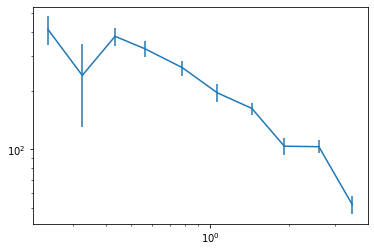

In [55]:
plt.errorbar(cl.DSprofile['radius'], cl.DSprofile['DeltaSigmat'],cl.DSprofile['DeltaSigmat_err'])
plt.xscale('log')
plt.yscale('log')